## Phase 2 Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset 
file_path = "data/phase2_results"
df = pd.read_csv(file_path, sep=",")

df.head(20)

,Case,Prompt,LLM,Ground Truth,Prediction
0,1,P1,GPT-4o,1,1
1,2,P1,GPT-4o,1,1
2,3,P1,GPT-4o,1,1
3,4,P1,GPT-4o,1,1
4,5,P1,GPT-4o,1,1
5,6,P1,GPT-4o,0,0
6,7,P1,GPT-4o,0,0
7,8,P1,GPT-4o,0,0
8,9,P1,GPT-4o,0,0
9,10,P1,GPT-4o,0,0


In [3]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [4]:
# Compute metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df[(df["Prompt"] == prompt) & (df["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        metrics.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_df.to_csv("30_cases_evaluation_results.csv", index=False)

# Print summary
print(metrics_df)

  Prompt       LLM  Accuracy  Precision    Recall  F1 Score
0     P1    GPT-4o  0.933333   0.882353  1.000000  0.937500
1     P1  DeepSeek  0.700000   0.625000  1.000000  0.769231
2     P4    GPT-4o  0.800000   0.846154  0.733333  0.785714
3     P4  DeepSeek  0.800000   0.764706  0.866667  0.812500
4     P5    GPT-4o  0.800000   0.800000  0.800000  0.800000
5     P5  DeepSeek  0.800000   0.736842  0.933333  0.823529
6     P6    GPT-4o  0.733333   0.733333  0.733333  0.733333
7     P6  DeepSeek  0.833333   0.750000  1.000000  0.857143


C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\830797802.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\830797802.py:30: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\830797802.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)
C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\8

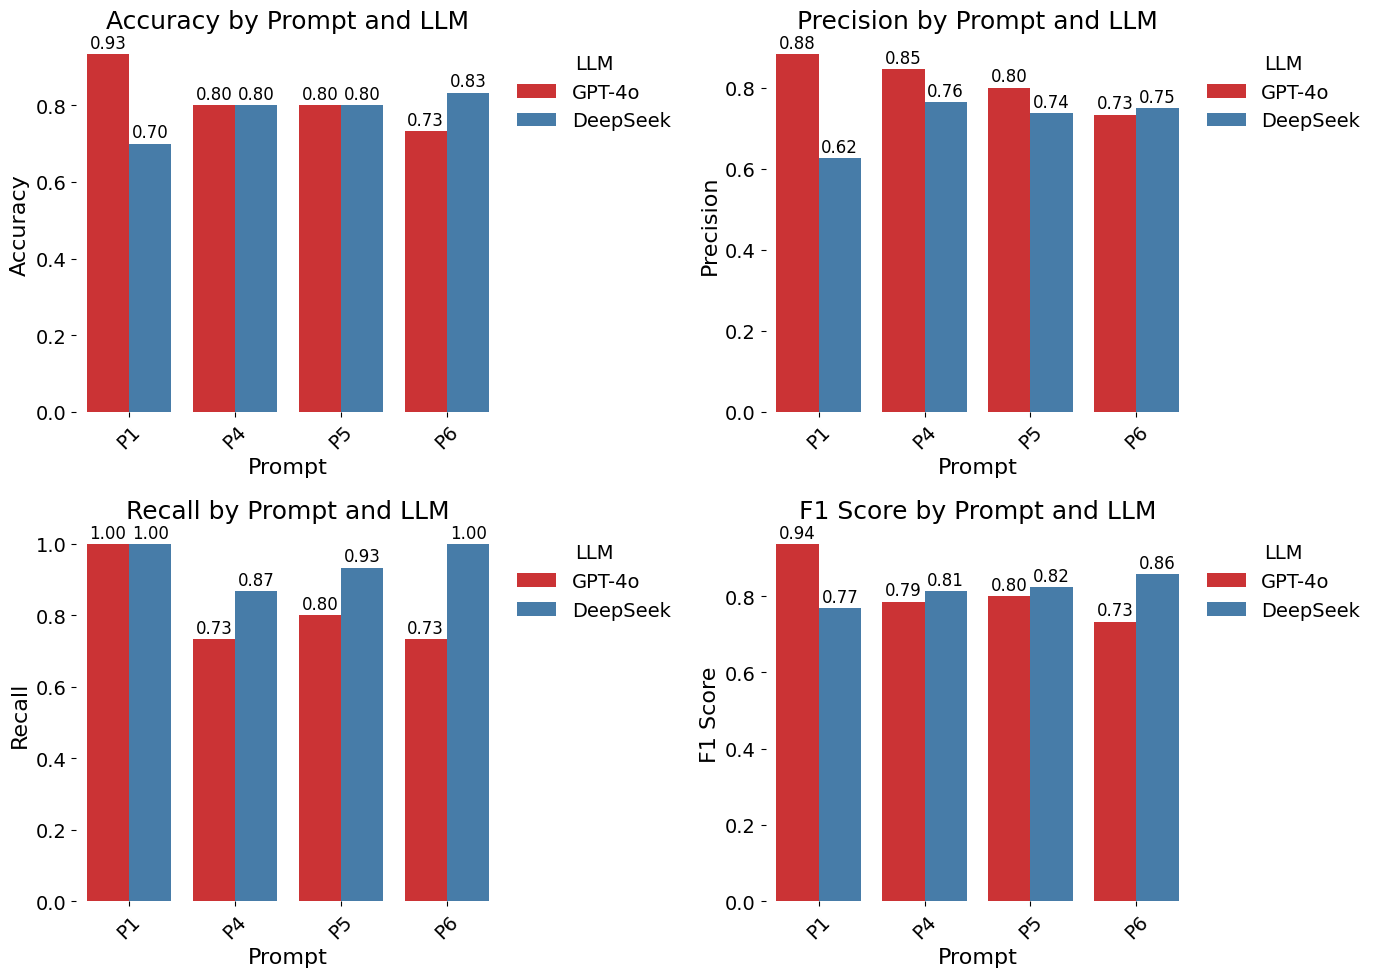

Mean scores per LLM:
           Accuracy  Precision    Recall  F1 Score
LLM                                              
DeepSeek  0.783333   0.719137  0.950000  0.815601
GPT-4o    0.816667   0.815460  0.816667  0.814137

Mean scores per Prompt:
         Accuracy  Precision    Recall  F1 Score
Prompt                                         
P1      0.816667   0.753676  1.000000  0.853365
P4      0.800000   0.805430  0.800000  0.799107
P5      0.800000   0.768421  0.866667  0.811765
P6      0.783333   0.741667  0.866667  0.795238


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "30_cases_evaluation_results.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 comes after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("Set1")  # Colorblind-friendly colors

# Set font size for all texts
plt.rcParams.update({'font.size': 14})

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
    ax.set_title(f"{metric} by Prompt and LLM", fontsize=18)
    ax.set_xlabel("Prompt", fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1), fontsize=14, frameon=False)  # Remove legend frame
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)

    # Add values on top of each bar, excluding zero values
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with non-zero height
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        fontsize=12, color='black', 
                        xytext=(0, 8), textcoords='offset points')

# Remove the borders around the plot area
for ax in axes.flatten():
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM:\n", llm_means)
print("\nMean scores per Prompt:\n", prompt_means)


